## **Apple App Store EDA**

The aim of this project is an **exploratory data analysis** of the Apple app store and its most (and least) popular applications. Our goal is to dive into and extract the attributes of a successful mobile application.

The data set can be found here: https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps

**The data was extracted from the iTunes Search API at the Apple Inc Website**

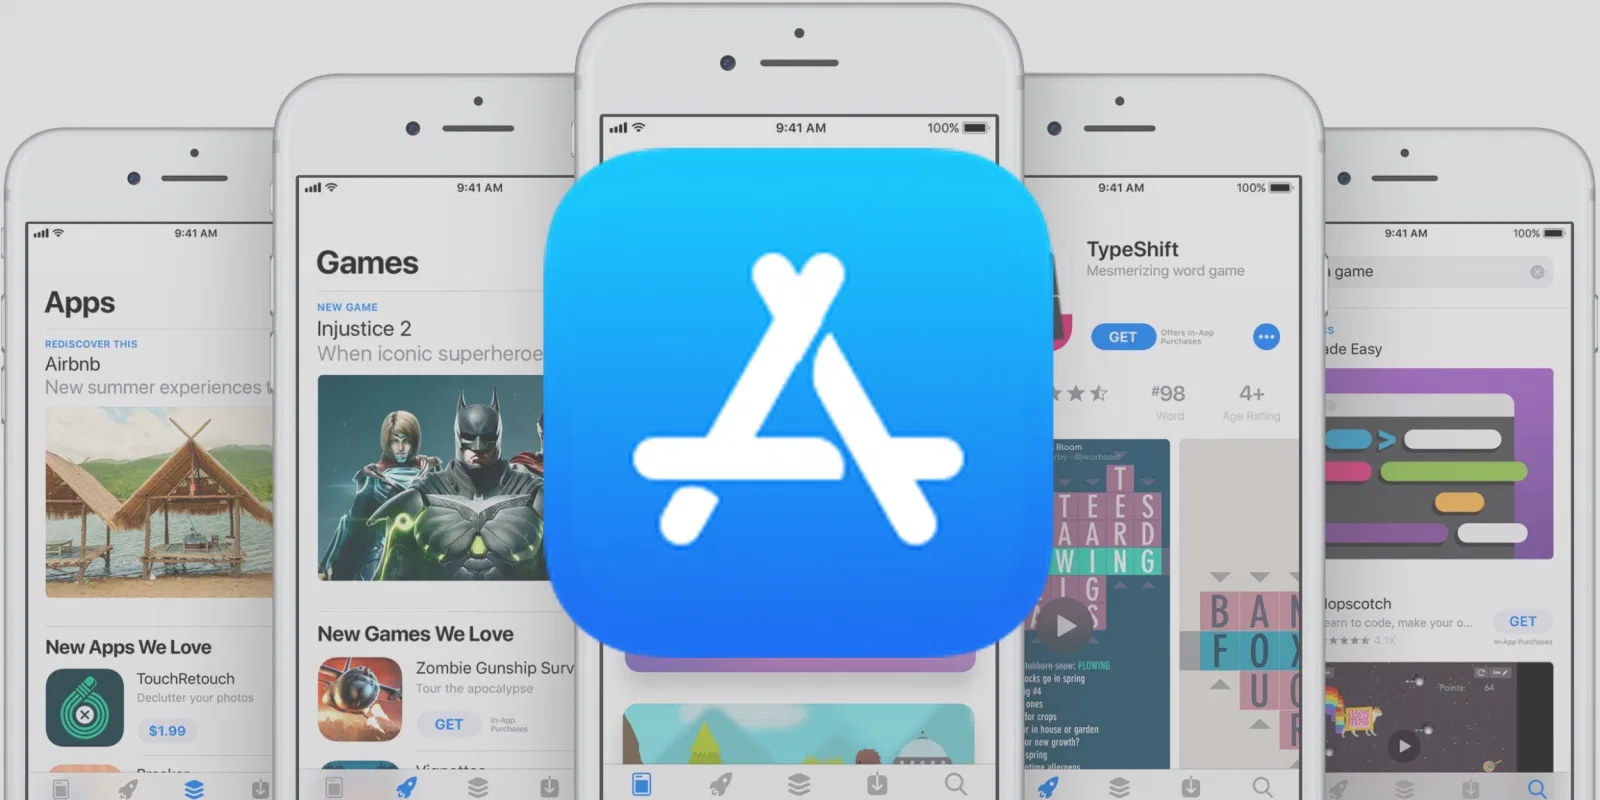

### Features
1. "id" : App ID

2. "track_name": App Name

3. "size_bytes": Size (in Bytes)

4. "currency": Currency Type

5. "price": Price amount

6. "ratingcounttot": User Rating counts (for all version)

7. "ratingcountver": User Rating counts (for current version)

8. "user_rating" : Average User Rating value (for all version)

9. "userratingver": Average User Rating value (for current version)

10. "ver" : Latest version code

11. "cont_rating": Content Rating

12. "prime_genre": Primary Genre

13. "sup_devices.num": Number of supporting devices

14. "ipadSc_urls.num": Number of screenshots showed for display

15. "lang.num": Number of supported languages

16. "vpp_lic": Vpp Device Based Licensing Enabled

### Import Libraries and Load the Data

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
app_data = pd.read_csv("App Store Data Set/AppleStore.csv")
app_data

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,11081,1187617475,Kubik,126644224,USD,0.00,142,75,4.5,4.5,1.3,4+,Games,38,5,1,1
7193,11082,1187682390,VR Roller-Coaster,120760320,USD,0.00,30,30,4.5,4.5,0.9,4+,Games,38,0,1,1
7194,11087,1187779532,Bret Michaels Emojis + Lyric Keyboard,111322112,USD,1.99,15,0,4.5,0.0,1.0.2,9+,Utilities,37,1,1,1
7195,11089,1187838770,VR Roller Coaster World - Virtual Reality,97235968,USD,0.00,85,32,4.5,4.5,1.0.15,12+,Games,38,0,2,1


In [93]:
app_data.shape

(7197, 17)

In [94]:
app_data['prime_genre'].unique()

array(['Games', 'Productivity', 'Weather', 'Shopping', 'Reference',
       'Finance', 'Music', 'Utilities', 'Travel', 'Social Networking',
       'Sports', 'Business', 'Health & Fitness', 'Entertainment',
       'Photo & Video', 'Navigation', 'Education', 'Lifestyle',
       'Food & Drink', 'News', 'Book', 'Medical', 'Catalogs'],
      dtype=object)

### **Data Cleaning**

In [95]:
# No Null Values
app_data.isna().sum()

Unnamed: 0          0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

Application size on the Apple App Store is listed as **megabytes**, so let's convert size_bytes to size_megabytes 

In [96]:
app_data.size_bytes = app_data.size_bytes/(1024*1024)
app_data.size_bytes = app_data.size_bytes.astype(int)
app_data.rename({"size_bytes":"size_mb"}, axis=1, inplace=True)

app_data.head()

,Unnamed: 0,id,track_name,size_mb,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,96,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,151,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",95,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",122,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,88,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


### Data Exploration

#### Create new DataFrames:
    1. Free Apps
    2. Paid Apps
    3. Games
    4. Entertainment Apps
    5. Social Networking Apps


In [97]:
free_apps = app_data.loc[app_data['price'] == 0.00]

In [98]:
paid_apps = app_data.loc[app_data['price'] != 0.00]

In [121]:
games = app_data.loc[app_data['prime_genre'] == 'Games']

In [122]:
entertainment = app_data.loc[app_data['prime_genre'] == 'Entertainment']

In [123]:
social_network = app_data.loc[app_data['prime_genre'] == 'Social Networking']

### Rating distribution

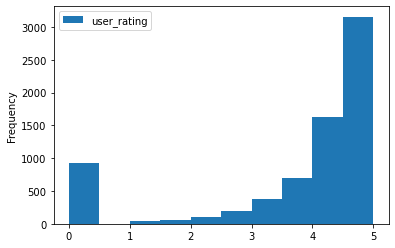

In [124]:
app_data_rating_hist = app_data[['user_rating']]
app_data_rating_hist.plot.hist(bins=10)

In [125]:
app_data_rating_hist.mean()

user_rating    3.526956
dtype: float64

Interestingly, we find that a majority of the apps in the App Store are rated very well (4-5). 

### There seems to be many applications with same rating 
   - Currently, we are determining an application with one review of 5.0 is a better application than a popular application with 1000+ reviews with an overall rating of 4.3 (This is not very useful)
   - This is an issue that can be solved by creating a new column called **weighted_rating**
   

### Created a weighted_rating column

- We cannot use the user_rating as a reliable score due to the applications' rating being largely influenced by the number of given rates. Instead we will be using a weighted rating formula:
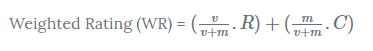
   - **v** is the number of ratings for the applications
   - **m** is the minimum votes required to be listed in the char
   - **R** is the user_rating of the application
   - **C** is the mean vote (in this case there is only one vote so we will use the average rating of all apps in the App Store = **3.5**)
   
We already have v(**ratingcounttot**), R(**user_rating**), and C(**3.5**)

The next step is to determine the appropriated value for **m**, the minumum ratings required to be listed on the chart. We will use the 80th percentile as our cutoff and compare the new Top 10 Apps 

In [126]:
# Calculate m & C
m = app_data['rating_count_tot'].quantile(0.8)
C = app_data_rating_hist.mean()

In [127]:
m

4782.6

In [128]:
C

user_rating    3.526956
dtype: float64

### Create DataFrames of applications that are qualified to be listed on the chart
- **free_apps_qualified**
- **paid_apps_qualified**
- **games_qualified**
- **entertainment_qualified**

In [129]:
free_apps_qualified = free_apps.copy().loc[free_apps['rating_count_tot']>= m]
free_apps_qualified.shape

(1064, 17)

In [130]:
paid_apps_qualified = paid_apps.copy().loc[paid_apps['rating_count_tot']>= m]
paid_apps_qualified.shape

(376, 17)

In [131]:
games_qualified = games.copy().loc[games['rating_count_tot']>= m]
games_qualified.shape

(811, 17)

In [132]:
entertainment_qualified = entertainment.copy().loc[entertainment['rating_count_tot']>= m]
entertainment_qualified.shape

(98, 17)

In [133]:
social_network_qualified = social_network.copy().loc[social_network['rating_count_tot']>= m]
social_network_qualified.shape

(52, 17)

We now have the qualified applications for these genres. Now, we need to calculate our metric for each qualified application. To do this, we will define a function called **weighted_rating()** and define a new feature column **score**, which we will calculate the value by applying this function to our Dataframes of qualified apps.

In [134]:
def weighted_rating(app_df, m=m, C=C):
    v = app_df['rating_count_tot']
    R = app_df['user_rating']
    
    # Calculation based on the weighted rating formula
    return (v/(v+m)*R) + (m/(v+m) * C)

In [135]:
# Define a new feature called 'score' and calculate its value
free_apps_qualified['score'] = free_apps_qualified.apply(weighted_rating, axis = 1)

paid_apps_qualified['score'] = paid_apps_qualified.apply(weighted_rating, axis = 1)

games_qualified['score'] = games_qualified.apply(weighted_rating, axis = 1)

entertainment_qualified['score'] = entertainment_qualified.apply(weighted_rating, axis = 1)

social_network_qualified['score'] = social_network_qualified.apply(weighted_rating, axis = 1)

### Top 10 Free Apps

In [145]:
# Sort free apps based on calculated scores
free_apps_qualified = free_apps_qualified.sort_values('score', ascending=False)

# Print the top 10 free apps
free_apps_qualified[['track_name', 'rating_count_tot', 'user_rating', 'score']].head(10)

,track_name,rating_count_tot,user_rating,score
1104,Head Soccer,481564,5.0,4.985514
3086,Sniper 3D Assassin: Shoot to Kill Gun Game,386521,5.0,4.981996
2177,Geometry Dash Lite,370370,5.0,4.981221
810,Domino's Pizza USA,258624,5.0,4.973254
2731,CSR Racing 2,257100,5.0,4.973099
1802,Pictoword: Fun 2 Pics Guess What's the Word Tr...,186089,5.0,4.963090
1817,Iron Force,141634,5.0,4.951884
1918,Sniper Shooter: Gun Shooting Games,134080,5.0,4.949267
467,Flashlight Ⓞ,130450,5.0,4.947905
884,Pic Collage - Picture Editor & Photo Collage M...,123433,5.0,4.945054


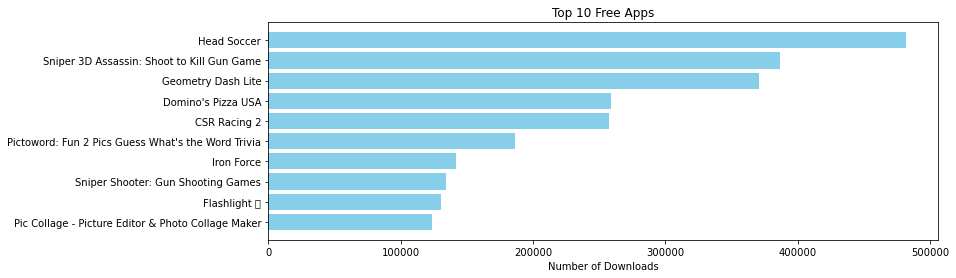

In [148]:
plt.figure(figsize=(12,4))

plt.barh(free_apps_qualified['track_name'].head(10), free_apps_qualified['rating_count_tot'].head(10),
        align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Number of Downloads")
plt.title("Top 10 Free Apps");

### Top 10 Paid Apps

In [137]:
# Sort paid apps based on calculated scores
paid_apps_qualified = paid_apps_qualified.sort_values('score', ascending=False)

# Print the top 10 paid apps
paid_apps_qualified[['track_name', 'rating_count_tot', 'user_rating', 'score']].head(10)

,track_name,rating_count_tot,user_rating,score
302,Plants vs. Zombies,426463,5.0,4.983664
498,Infinity Blade,326482,5.0,4.978733
1877,Geometry Dash,266440,5.0,4.974025
350,Plants vs. Zombies HD,163598,5.0,4.958160
1484,The Room,143908,5.0,4.952620
970,HB2 PLUS,54073,5.0,4.880301
1191,Ski Safari,45121,5.0,4.858828
2064,The Room Two,36809,5.0,4.830615
1588,Yoga Studio,28439,5.0,4.787940
271,TurboScan™ Pro - document & receipt scanner: s...,28388,5.0,4.787614


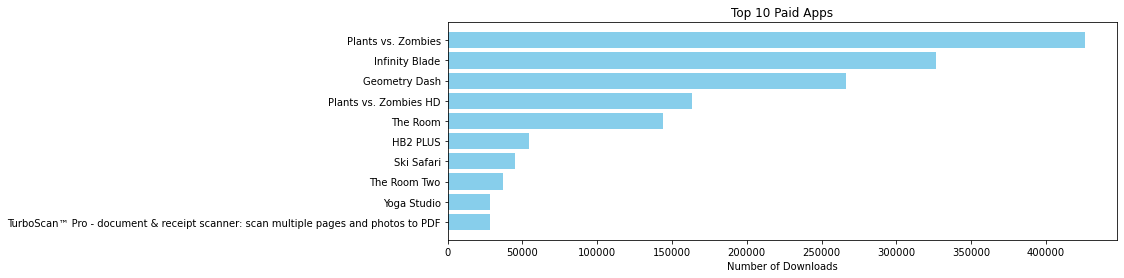

In [156]:
plt.figure(figsize=(12,4))

plt.barh(paid_apps_qualified['track_name'].head(10), paid_apps_qualified['rating_count_tot'].head(10),
        align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Number of Downloads")
plt.title("Top 10 Paid Apps");

### Top 10 Games

In [138]:
games_qualified = games_qualified.sort_values('score', ascending=False)
games_qualified[['track_name', 'rating_count_tot', 'user_rating', 'score']].head(10)

,track_name,rating_count_tot,user_rating,score
1104,Head Soccer,481564,5.0,4.985514
302,Plants vs. Zombies,426463,5.0,4.983664
3086,Sniper 3D Assassin: Shoot to Kill Gun Game,386521,5.0,4.981996
2177,Geometry Dash Lite,370370,5.0,4.981221
498,Infinity Blade,326482,5.0,4.978733
1877,Geometry Dash,266440,5.0,4.974025
2731,CSR Racing 2,257100,5.0,4.973099
1802,Pictoword: Fun 2 Pics Guess What's the Word Tr...,186089,5.0,4.963090
350,Plants vs. Zombies HD,163598,5.0,4.958160
1484,The Room,143908,5.0,4.952620


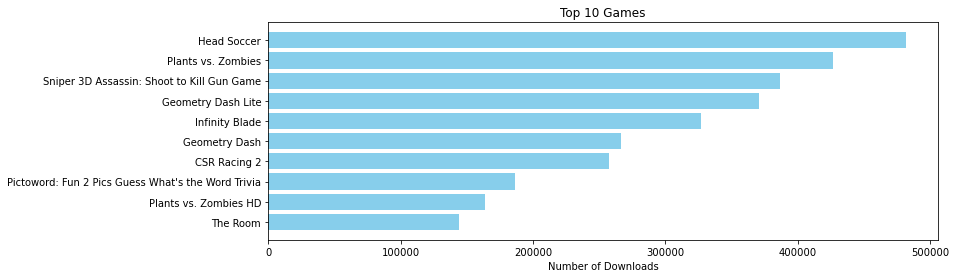

In [157]:
plt.figure(figsize=(12,4))

plt.barh(games_qualified['track_name'].head(10), games_qualified['rating_count_tot'].head(10),
        align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Number of Downloads")
plt.title("Top 10 Games");

### Top 10 Entertainment Apps

In [139]:
entertainment_qualified = entertainment_qualified.sort_values('score', ascending = False)
entertainment_qualified[['track_name', 'rating_count_tot', 'user_rating', 'score']].head(10)

,track_name,rating_count_tot,user_rating,score
2893,Bruh-Button,17487,5.0,4.683650
3942,Colorfy: Coloring Book for Adults,247809,4.5,4.481576
274,IMDb Movies & TV - Trailers and Showtimes,183425,4.5,4.475274
941,Twitch,109549,4.5,4.459297
1118,Action Movie FX,101222,4.5,4.456099
1133,The CW,97368,4.5,4.454443
2278,Xbox,72187,4.5,4.439539
1216,Emoji>,55338,4.5,4.422594
1607,FOX NOW - Watch Full Episodes and Stream Live TV,39391,4.5,4.394650
6514,Pixel Color Ball Fell From The Sky,6493,5.0,4.375201


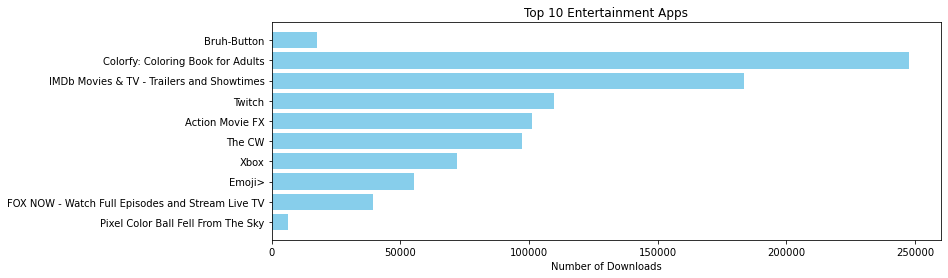

In [158]:
plt.figure(figsize=(12,4))

plt.barh(entertainment_qualified['track_name'].head(10), entertainment_qualified['rating_count_tot'].head(10),
        align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Number of Downloads")
plt.title("Top 10 Entertainment Apps");

### Top 10 Social Networking Apps

In [140]:
social_network_qualified = social_network_qualified.sort_values('score', ascending=False)
social_network_qualified[['track_name', 'rating_count_tot', 'user_rating', 'score']].head(10)

,track_name,rating_count_tot,user_rating,score
1411,"We Heart It - Fashion, wallpapers, quotes, tat...",90414,5.0,4.925995
755,Pinterest,1061624,4.5,4.495636
125,WhatsApp Messenger,287589,4.5,4.484083
752,"ooVoo – Free Video Call, Text and Voice",177501,4.5,4.474470
477,Viber Messenger – Text & Call,164249,4.5,4.472469
1485,Followers - Social Analytics For Instagram,112778,4.5,4.460415
1534,InsTrack for Instagram - Analytics Plus More,85535,4.5,4.448474
411,"Tango - Free Video Call, Voice and Chat",75412,4.5,4.441970
483,"Find My Family, Friends & iPhone - Life360 Loc...",43877,4.5,4.404363
1629,LINE PLAY - Your Avatar World,34677,4.5,4.382065


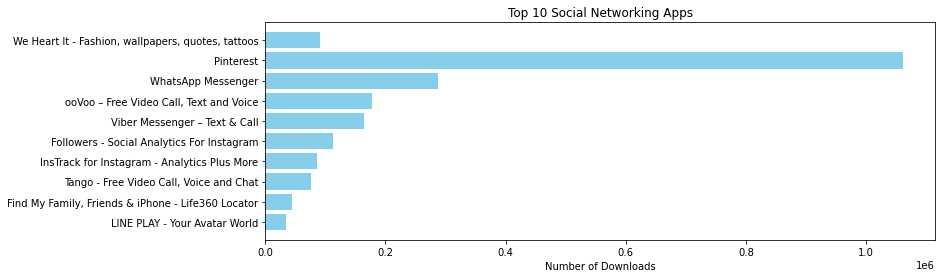

In [159]:
plt.figure(figsize=(12,4))

plt.barh(social_network_qualified['track_name'].head(10), social_network_qualified['rating_count_tot'].head(10),
        align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Number of Downloads")
plt.title("Top 10 Social Networking Apps");

### **Number of Apps per Category**

,prime_genre,number of apps
7,Games,3862
4,Entertainment,535
3,Education,453
14,Photo & Video,349
21,Utilities,248
8,Health & Fitness,180
15,Productivity,178
18,Social Networking,167
9,Lifestyle,144
11,Music,138


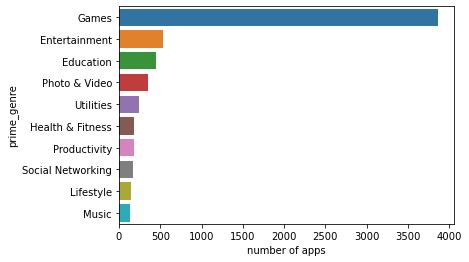

In [141]:
app_data_category = app_data.groupby(['prime_genre'])[['id']].count().reset_index().sort_values('id',ascending=False)
app_data_category.columns = ['prime_genre', 'number of apps']

top_categories = app_data_category.head(10)

sns.barplot(y = 'prime_genre', x = 'number of apps', data=top_categories)
top_categories

We can see that the most popular application category by a large margin are **Games** with 3862. The **Entertainment** category follows with 535.

We can also find the least popular categories in the Apple store.

,prime_genre,number of apps
5,Finance,104
20,Travel,81
13,News,75
22,Weather,72
16,Reference,64
6,Food & Drink,63
1,Business,57
12,Navigation,46
10,Medical,23
2,Catalogs,10


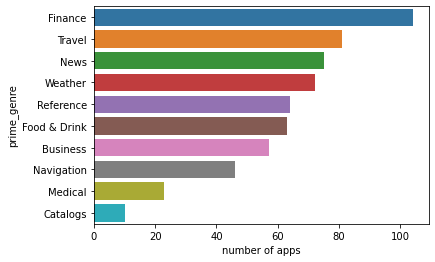

In [142]:
top_categories = app_data_category.tail(10)
sns.barplot(y = 'prime_genre', x = 'number of apps', data=top_categories)
top_categories

Comparing the two charts, we can see that the top 10 most popular applications make up of categories that can be used for daily tasks. 

In comparison, the least popular apps make up of categories that individuals would be better off searching the internet for.

**Keep in mind this data was collected in 2017, before online delivery apps were mainstream. I would expect the number of apps (DoorDash, GrubHub, UberEats, Postmates, etc.) would be much higher on this list now.** 

### Let's find the Top 10 most downloaded apps from the Top 5 most popular applications

### 1. Games

,track_name,rating_count_tot
1346,Clash of Clans,2130805
707,Temple Run,1724546
1493,Candy Crush Saga,961794
275,Angry Birds,824451
1246,Subway Surfers,706110
348,Fruit Ninja Classic,698516
343,Solitaire,679055
990,CSR Racing,677247
3042,Crossy Road - Endless Arcade Hopper,669079
1634,Injustice: Gods Among Us,612532


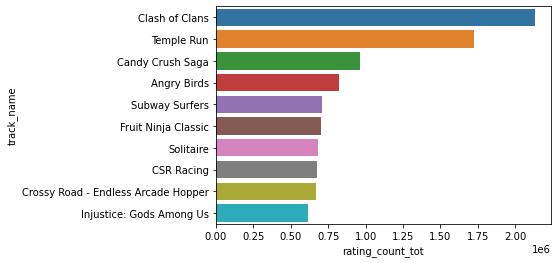

In [165]:
games = games.sort_values('rating_count_tot', ascending=False)
games_downloads = games.head(10)

sns.barplot(y = 'track_name', x = 'rating_count_tot', data=games_downloads)
games_downloads[['track_name', 'rating_count_tot']].head(10)

### 2. Entertainment

,track_name,rating_count_tot
358,Netflix,308844
112,Fandango Movies - Times + Tickets,291787
3942,Colorfy: Coloring Book for Adults,247809
78,Pocket God,187529
274,IMDb Movies & TV - Trailers and Showtimes,183425
215,TRUTH or DARE!!! - FREE,171055
189,Mad Libs,117889
941,Twitch,109549
1118,Action Movie FX,101222
258,Voice Changer Plus,98777


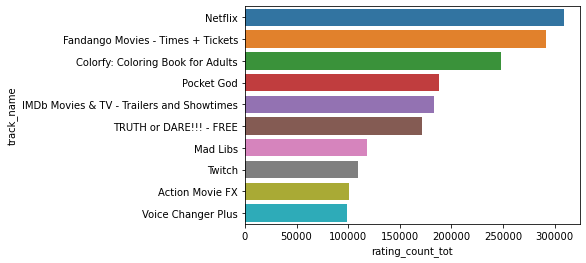

In [166]:
entertainment = entertainment.sort_values('rating_count_tot', ascending=False)
entertainment_downloads = entertainment.head(10)

sns.barplot(y = 'track_name', x = 'rating_count_tot', data=entertainment_downloads)
entertainment_downloads[['track_name', 'rating_count_tot']].head(10)

### 3. Education

In [167]:
education = app_data.loc[app_data['prime_genre'] == 'Education']

,track_name,rating_count_tot
1597,"Duolingo - Learn Spanish, French and more",162701
154,Guess My Age  Math Magic,123190
1644,Lumosity - Brain Training,96534
2655,Elevate - Brain Training and Games,58092
1566,Fit Brains Trainer,46363
1488,ClassDojo,35440
1596,Toca Hair Salon 2,23349
1920,Memrise: learn languages,20383
2457,Peak - Brain Training,20322
1066,Canvas by Instructure,19981


C:\Users\19253\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 57376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\19253\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 57376 missing from current font.
  font.set_text(s, 0, flags=flags)


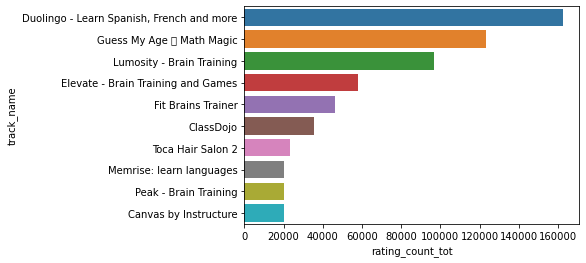

In [169]:
education = education.sort_values('rating_count_tot', ascending=False)
education_downloads = education.head(10)

sns.barplot(y = 'track_name', x = 'rating_count_tot', data=education_downloads)
education_downloads[['track_name', 'rating_count_tot']].head(10)

### 4. Photo & Video

In [170]:
photo_video = app_data.loc[app_data['prime_genre'] == 'Photo & Video']

,track_name,rating_count_tot
519,Instagram,2161558
872,Snapchat,323905
1433,"YouTube - Watch Videos, Music, and Live Streams",278166
884,Pic Collage - Picture Editor & Photo Collage M...,123433
2553,Funimate video editor: add cool effects to videos,123268
2525,musical.ly - your video social network,105429
1360,Photo Collage Maker & Photo Editor - Live Collage,93781
1751,Vine Camera,90355
3414,Google Photos - unlimited photo and video storage,88742
1245,Flipagram,79905


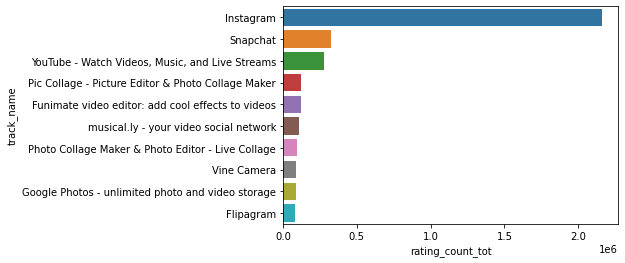

In [178]:
photo_video = photo_video.sort_values('rating_count_tot', ascending=False)
photo_video_downloads = photo_video.head(10)

sns.barplot(y = 'track_name', x = 'rating_count_tot', data=photo_video_downloads)
photo_video_downloads[['track_name', 'rating_count_tot']].head(10)

### 5. Utilities

In [175]:
utilities = app_data.loc[app_data['prime_genre'] == 'Utilities']

,track_name,rating_count_tot
12,Google – Search made just for mobile,479440
467,Flashlight Ⓞ,130450
690,My Verizon,126948
119,myAT&T,108507
574,The Calculator - Free and Easy Calculating!,99244
77,Speedtest by Ookla,65016
1394,Google Chrome – The Fast and Secure Web Browser,55750
1032,Alarm Clock HD Free - Digital Alarm Clock Display,54496
2315,Calculator Pro for iPad Free - Smart Calculator,47803
2625,Bitmoji - Your Personal Emoji,37972


C:\Users\19253\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 9412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\19253\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 9412 missing from current font.
  font.set_text(s, 0, flags=flags)


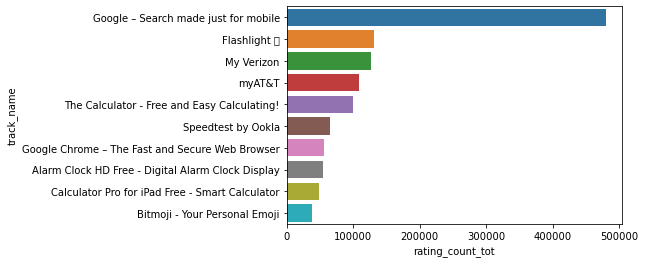

In [179]:
utilities = utilities.sort_values('rating_count_tot', ascending=False)
utilities_downloads = utilities.head(10)

sns.barplot(y = 'track_name', x = 'rating_count_tot', data=utilities_downloads)
utilities_downloads[['track_name', 'rating_count_tot']].head(10)

## Summary of Findings

In order to have a more accurate listing of Top apps in each genre, I created a weighted rating column that utilized both the user_rating and total number of reviews to create a more scalable list of Top Applications.

Given the data and the insights that were derived from the EDA, we can see that applications under the **Games** category are by far the most listed on the app store. This could be because games are often stimulating and can create hours of fun usage time for the users. In addition, games whether they are free or paid-for applications, often have in-app purchases that incentivize more individual developers and gaming companies to release their own games on the Apple App Store.

Following the Games category was: **Entertainment, Education, Photo & Video, Utilities applications**. A common theme among these apps are that they are generalizable to the general public, being phone necessities for nearly every age range. 

In conclusion, this is an exploratory data analysis of the Mobile App Store Data Set. We found various insights such as top applications according to **genre, most popular type of apps, and most downloaded**.

In the future, I would like to use this data set on regression machine learning algorithms and determining which of 16 characteristics most influenced the applications' overall score. We can further research and apply AI to also create a recommendation system for similar applications based on the 16 characteristics and the **App Description data set** also provided on:

https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps